In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!apt-get install python3.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.6 is already the newest version (3.6.9-1~18.04ubuntu1.4).
python3.6 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 32.3 MB/s 
     |████████████████████████████████| 9.5 MB 47.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install --user scipy==1.2.0
!pip install pymcmcstat

     |████████████████████████████████| 26.6 MB 69 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 1.8.2 requires scipy>=1.3.2, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 136 kB 30.8 MB/s 


In [ ]:
import pymcmcstat
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARIMAResults,ARMAResults
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [ ]:
time = pd.read_excel('time.xlsx')

FileNotFoundError: ignored

In [ ]:
time.head()

,patient_type,x,y,z,pressure,gripangle,timestamp,testid,patient_type.1,t_main
0,c_002,199,202,0,126,860,1732464831,0,control,0
1,c_002,199,202,0,202,860,1732464838,0,control,7
2,c_002,199,202,0,276,860,1732464845,0,control,14
3,c_002,199,202,12,328,860,1732464852,0,control,21
4,c_002,199,202,0,373,860,1732464859,0,control,28


In [ ]:
time['t_main'] = pd.to_datetime(time['t_main'],unit='s')
time.set_index('t_main',inplace=True)

In [ ]:
time.head()

,patient_type,x,y,z,pressure,gripangle,timestamp,testid,patient_type.1
t_main,,,,,,,,,
1970-01-01 00:00:00,c_002,199,202,0,126,860,1732464831,0,control
1970-01-01 00:00:07,c_002,199,202,0,202,860,1732464838,0,control
1970-01-01 00:00:14,c_002,199,202,0,276,860,1732464845,0,control
1970-01-01 00:00:21,c_002,199,202,12,328,860,1732464852,0,control
1970-01-01 00:00:28,c_002,199,202,0,373,860,1732464859,0,control


In [ ]:
time = time.drop(['patient_type','timestamp'],axis=1)

In [ ]:
pd1 = pd.read_excel('pd1.xlsx')
pd2 = pd.read_excel('pd2.xlsx')

In [ ]:
c1 = pd.read_excel('control1.xlsx')
c2 = pd.read_excel('c2.xlsx')

In [ ]:
pd1.head()

,patient_type,x,y,z,pressure,gripangle,timestamp,testid,patient_type.1
0,P_02100001,213,205,0,15,1440,1351716,0,PD
1,P_02100001,213,205,0,47,1440,1351725,0,PD
2,P_02100001,213,205,0,68,1440,1351734,0,PD
3,P_02100001,213,205,0,84,1420,1351743,0,PD
4,P_02100001,214,205,0,88,1440,1351752,0,PD


In [ ]:
len(pd1), len(pd2)

(2627, 5595)

In [ ]:
len(c1), len(c2)

(6815, 6109)

In [ ]:
pd1['time'] = pd.DataFrame(pd.date_range('20210101 00:00:00',freq='9S',periods=2627))
pd1.set_index('time',inplace=True)

pd2['time'] = pd.DataFrame(pd.date_range('20210101 00:00:00',freq='9S',periods=5595))
pd2.set_index('time',inplace=True)

In [ ]:
pd1.head()

,patient_type,x,y,z,pressure,gripangle,timestamp,testid,patient_type.1
time,,,,,,,,,
2021-01-01 00:00:00,P_02100001,213,205,0,15,1440,1351716,0,PD
2021-01-01 00:00:09,P_02100001,213,205,0,47,1440,1351725,0,PD
2021-01-01 00:00:18,P_02100001,213,205,0,68,1440,1351734,0,PD
2021-01-01 00:00:27,P_02100001,213,205,0,84,1420,1351743,0,PD
2021-01-01 00:00:36,P_02100001,214,205,0,88,1440,1351752,0,PD


In [ ]:
pd1.index.freq = '9S'
pd2.index.freq = '9S'

In [ ]:
c1['time'] = pd.DataFrame(pd.date_range('20210101 00:00:00',freq='7S',periods=6815))
c1.set_index('time',inplace=True)

c2['time'] = pd.DataFrame(pd.date_range('20210101 00:00:00',freq='7S',periods=6109))
c2.set_index('time',inplace=True)

In [ ]:
c1.head()

,patient_type,x,y,z,pressure,gripangle,timestamp,testid,patient_type.1
time,,,,,,,,,
2021-01-01 00:00:00,c_002,199,202,0,126,860,1732464831,0,control
2021-01-01 00:00:07,c_002,199,202,0,202,860,1732464838,0,control
2021-01-01 00:00:14,c_002,199,202,0,276,860,1732464845,0,control
2021-01-01 00:00:21,c_002,199,202,12,328,860,1732464852,0,control
2021-01-01 00:00:28,c_002,199,202,0,373,860,1732464859,0,control


In [ ]:
c1.index.freq = '7S'
c2.index.freq = '7S'

In [ ]:
c2.head()

,patient_type,x,y,z,pressure,gripangle,timestamp,testid,patient_type.1
time,,,,,,,,,
2021-01-01 00:00:00,c_004,200,203,0,73,1100,290479,0,control
2021-01-01 00:00:07,c_004,200,203,0,149,1100,290486,0,control
2021-01-01 00:00:14,c_004,200,203,0,227,1110,290493,0,control
2021-01-01 00:00:21,c_004,199,203,0,288,1110,290500,0,control
2021-01-01 00:00:28,c_004,199,203,0,334,1110,290507,0,control


In [ ]:
pd1 = pd1.rename(columns={'patient_type.1':'patient_type'})
pd2 = pd2.rename(columns={'patient_type.1':'patient_type'})
c1 = c1.rename(columns={'patient_type.1':'patient_type'})
c2 = c2.rename(columns={'patient_type.1':'patient_type'})

In [ ]:
time = time.rename(columns={'patient_type.1':'patient_type'})

In [ ]:
time.head()

,x,y,z,pressure,gripangle,testid,patient_type
t_main,,,,,,,
1970-01-01 00:00:00,199,202,0,126,860,0,control
1970-01-01 00:00:07,199,202,0,202,860,0,control
1970-01-01 00:00:14,199,202,0,276,860,0,control
1970-01-01 00:00:21,199,202,12,328,860,0,control
1970-01-01 00:00:28,199,202,0,373,860,0,control


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
time['patient_type'] = encoder.fit_transform(time['patient_type'])

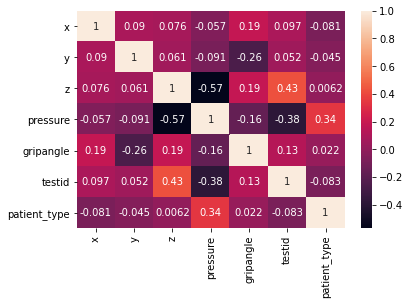

In [ ]:
sns.heatmap(time.corr(),annot=True)

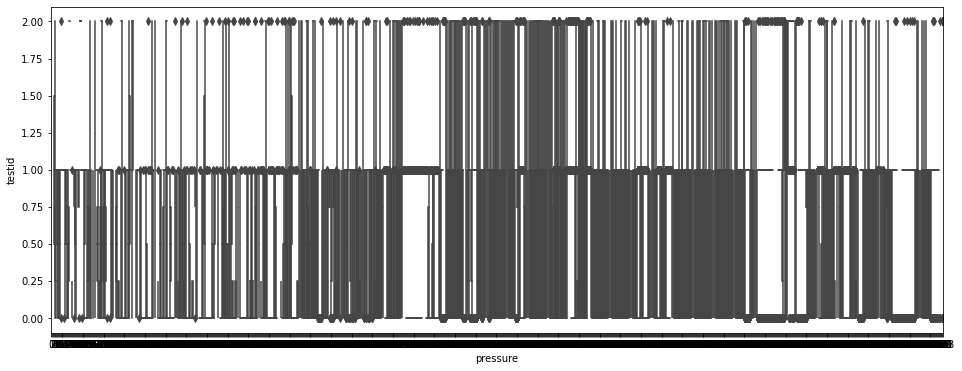

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(x=time['pressure'],y=time['testid'])

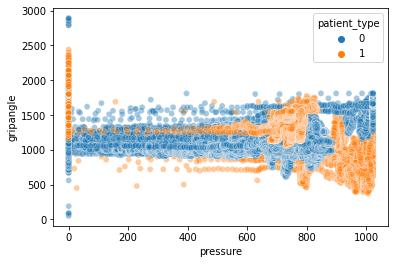

In [ ]:
sns.scatterplot(data=time,x='pressure',y='gripangle',hue='patient_type',alpha=0.4)

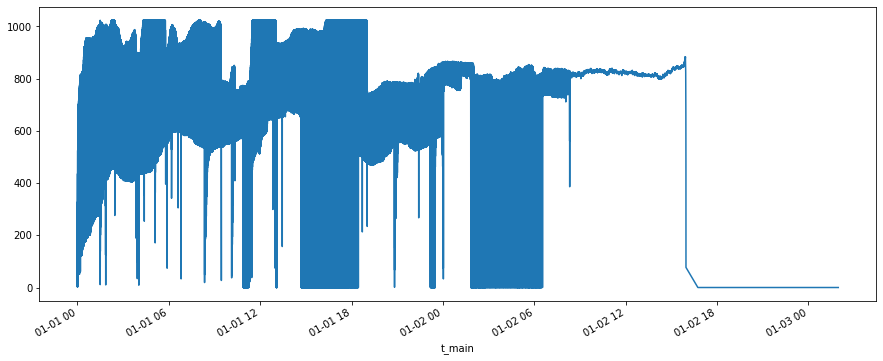

In [ ]:
time.pressure.plot(figsize=(15,6))

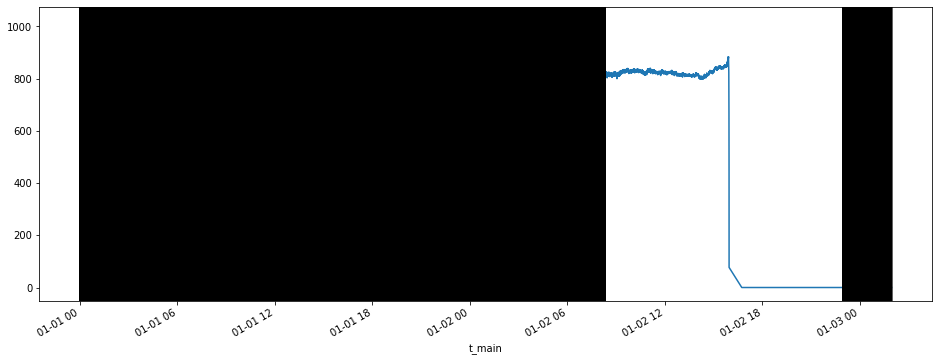

In [ ]:
ax = time['pressure'].plot(figsize=(16,6))

for i in time.query('patient_type==1').index:
  ax.axvline(x=i,color='black',alpha=0.5)

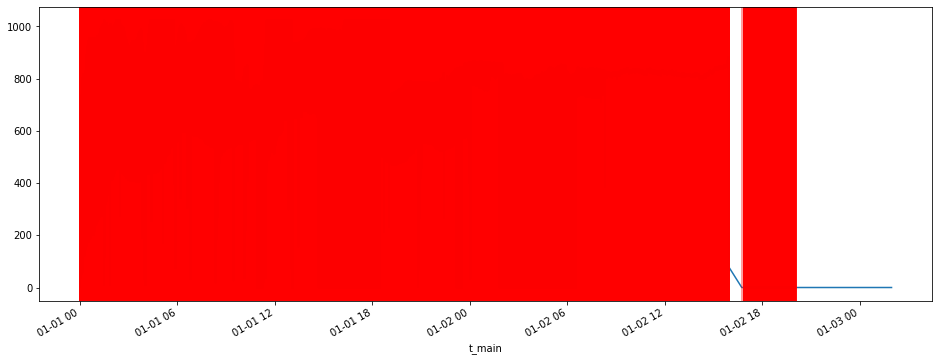

In [ ]:
ax = time['pressure'].plot(figsize=(16,6))

for i in time.query('patient_type==0').index:
  ax.axvline(x=i,color='red',alpha=0.5)

In [ ]:
c1.head()

,patient_type,x,y,z,pressure,gripangle,timestamp,testid,patient_type
time,,,,,,,,,
2021-01-01 00:00:00,c_002,199,202,0,126,860,1732464831,0,control
2021-01-01 00:00:07,c_002,199,202,0,202,860,1732464838,0,control
2021-01-01 00:00:14,c_002,199,202,0,276,860,1732464845,0,control
2021-01-01 00:00:21,c_002,199,202,12,328,860,1732464852,0,control
2021-01-01 00:00:28,c_002,199,202,0,373,860,1732464859,0,control


In [ ]:
c1.drop(['patient_type','patient_type','timestamp'],axis=1,inplace=True)
c2.drop(['patient_type','patient_type','timestamp'],axis=1,inplace=True)
pd1.drop(['patient_type','patient_type','timestamp'],axis=1,inplace=True)
pd2.drop(['patient_type','patient_type','timestamp'],axis=1,inplace=True)

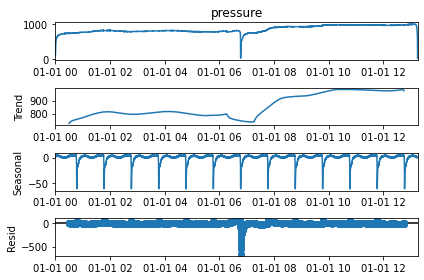

In [ ]:
decompfreq = 514 
result = seasonal_decompose(c1['pressure'],period=decompfreq)
result.plot();

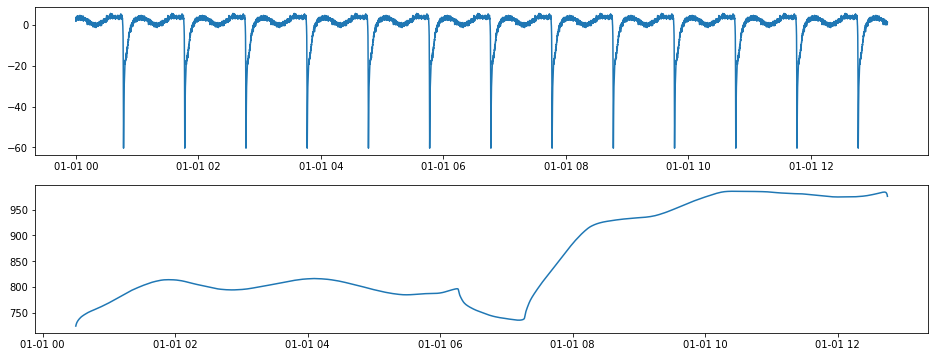

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(16,6))
ax1.plot(result.seasonal),
ax2.plot(result.trend)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


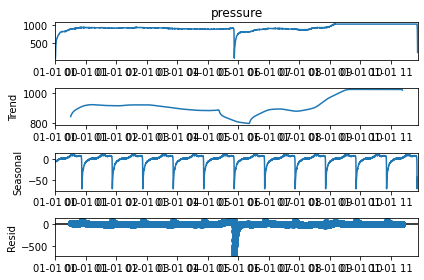

In [ ]:
decompfreq = 514
result_c2 = seasonal_decompose(c2['pressure'],freq=decompfreq)
result_c2.plot();

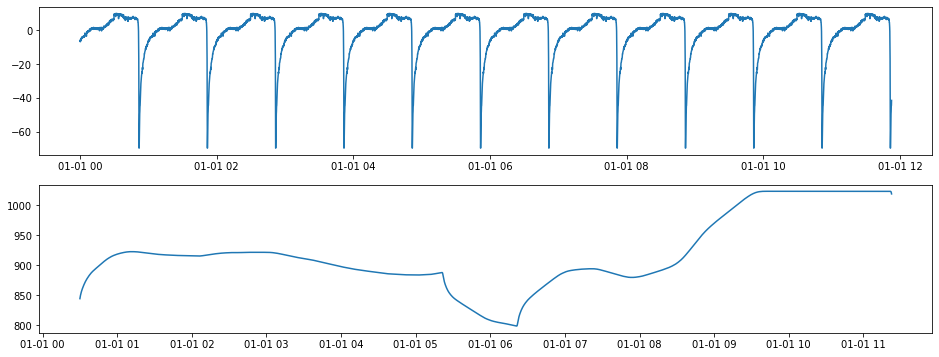

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(16,6))
ax1.plot(result_c2.seasonal),
ax2.plot(result_c2.trend)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


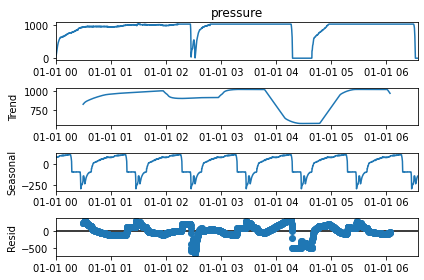

In [ ]:
decompfreq = 400 #60/9 * 60
result_pd = seasonal_decompose(pd1['pressure'],freq=decompfreq,two_sided=True)
result_pd.plot();

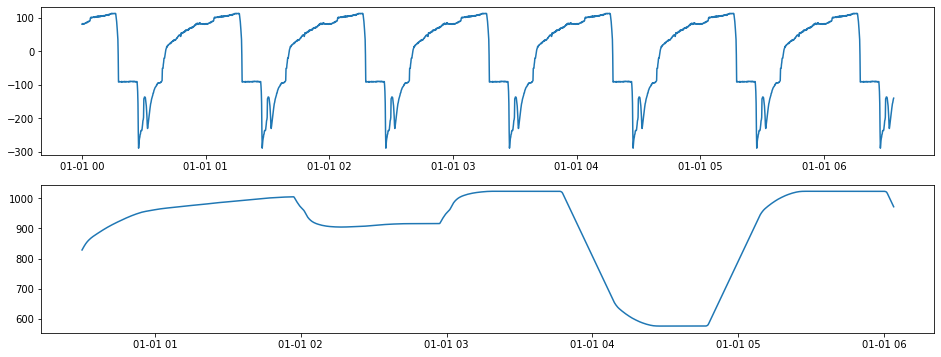

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(16,6))
ax1.plot(result_pd.seasonal),
ax2.plot(result_pd.trend)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


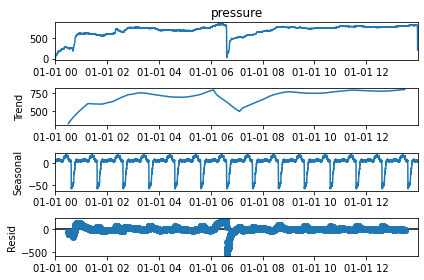

In [ ]:
decompfreq = 400 # length of rows/freq = 2627/9
result_pd2 = seasonal_decompose(pd2['pressure'],freq=decompfreq)
result_pd2.plot();

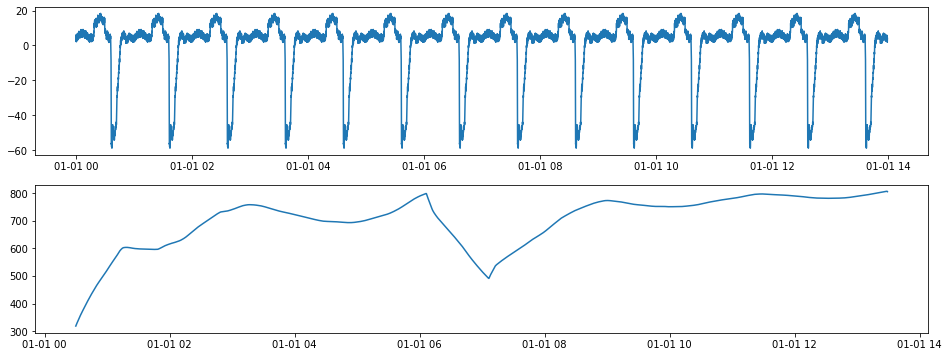

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(16,6))
ax1.plot(result_pd2.seasonal),
ax2.plot(result_pd2.trend)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series,title=''):

  print(f'Augmented Dickey-Fuller Test: {title}')
  result = adfuller(series.dropna(),autolag='AIC') # incase data has missing values

  labels = ['ADF test statistic','p-value','Lags used','Observations']
  out = pd.Series(result[0:4],index=labels)

  for key,val in result[4].items():
    out[f'critical value ({key})'] = val

  print(out.to_string()) # incase dtype:float64

  if result[1] <= 0.05:
    print('Strong evidence againgst null hypothesis')
    print('reject the null hypothesis')
    print('data has no unit root and is staionary')
  else:
    print('week evidence againgst null hypothesis')
    print('Fail to reject the null hypothesis')
    print('data has a unit root and is non-staionary')

In [ ]:
adf_test(c1['pressure']), adf_test(c2['pressure'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.556385
p-value                    0.505457
Lags used                 34.000000
Observations            6780.000000
critical value (1%)       -3.431315
critical value (5%)       -2.861966
critical value (10%)      -2.566997
week evidence againgst null hypothesis
Fail to reject the null hypothesis
data has a unit root and is non-staionary
Augmented Dickey-Fuller Test: 
ADF test statistic        -3.630812
p-value                    0.005199
Lags used                 34.000000
Observations            6074.000000
critical value (1%)       -3.431427
critical value (5%)       -2.862016
critical value (10%)      -2.567023
Strong evidence againgst null hypothesis
reject the null hypothesis
data has no unit root and is staionary


(None, None)

In [ ]:
adf_test(pd1['pressure']), adf_test(pd2['pressure'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -3.228171
p-value                    0.018411
Lags used                 28.000000
Observations            2598.000000
critical value (1%)       -3.432870
critical value (5%)       -2.862653
critical value (10%)      -2.567363
Strong evidence againgst null hypothesis
reject the null hypothesis
data has no unit root and is staionary
Augmented Dickey-Fuller Test: 
ADF test statistic        -3.126631
p-value                    0.024644
Lags used                 33.000000
Observations            5561.000000
critical value (1%)       -3.431526
critical value (5%)       -2.862060
critical value (10%)      -2.567047
Strong evidence againgst null hypothesis
reject the null hypothesis
data has no unit root and is staionary


(None, None)

In [ ]:
auto_arima(c1['pressure'],seasonal=False).summary(), auto_arima(c2['pressure'],seasonal=False).summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                      y   No. Observations:                 6815
 Model:               SARIMAX(5, 2, 1)   Log Likelihood              -22635.471
 Date:                Mon, 13 Sep 2021   AIC                          45284.943
 Time:                        07:58:19   BIC                          45332.729
 Sample:                             0   HQIC                         45301.431
                                - 6815                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.4493      0.003    137.648      0.000       0.443       0.456
 ar.L2         -0.0311      0.002    -16.223      0.000      -0.035   

In [ ]:
len(c1), len(c2)

(6815, 6109)

In [ ]:
train_c1= c1.iloc[:6500]
test_c1 = c1.iloc[6500:]

train_c2 = c2.iloc[:5700]
test_c2 = c2.iloc[5700:]

In [ ]:
#if value_error :non-invertible starting MA parameters found use enforce
model_c1 = SARIMAX(train_c1['pressure'],order=(5,2,1),enforce_invertibility=False)
#if value_error :non-invertible starting MA parameters found use enforce
model_c2 = SARIMAX(train_c2['pressure'],order=(1,2,5),enforce_invertibility=False)

In [ ]:
results_c1 = model_c1.fit()

In [ ]:
results_c2 = model_c2.fit()

In [ ]:
results_c1.summary(), results_c2.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:               pressure   No. Observations:                 6500
 Model:               SARIMAX(5, 2, 1)   Log Likelihood              -21114.108
 Date:                Mon, 13 Sep 2021   AIC                          42242.215
 Time:                        08:00:35   BIC                          42289.670
 Sample:                    01-01-2021   HQIC                         42258.629
                          - 01-01-2021                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.3518      0.001    254.892      0.000       0.349       0.355
 ar.L2         -0.0607      0.001    -44.948      0.000      -0.063   

In [ ]:
start_c1 = len(train_c1)
end_c1 = len(train_c1) + len(test_c1) - 1

start_c2 = len(train_c2)
end_c2 = len(train_c2) + len(test_c2) - 1


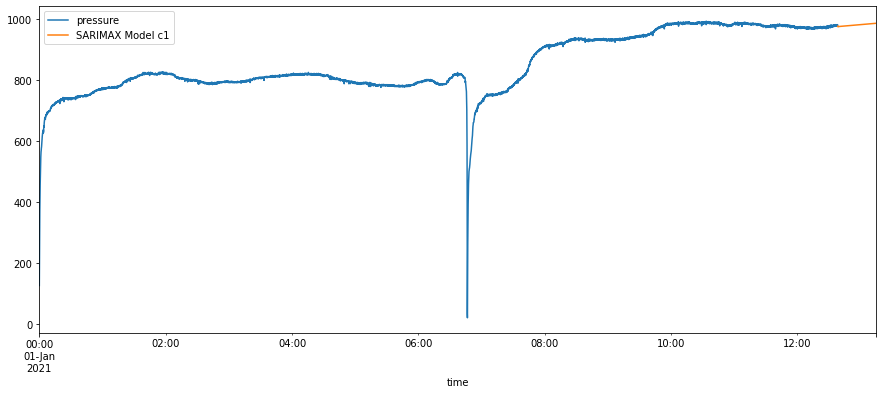

In [ ]:
predictions_c1 = results_c1.predict(start_c1,end_c1).rename('SARIMAX Model c1')

ax_c1 = train_c1['pressure'].plot(legend=True,figsize=(15,6))
predictions_c1.plot(legend=True)

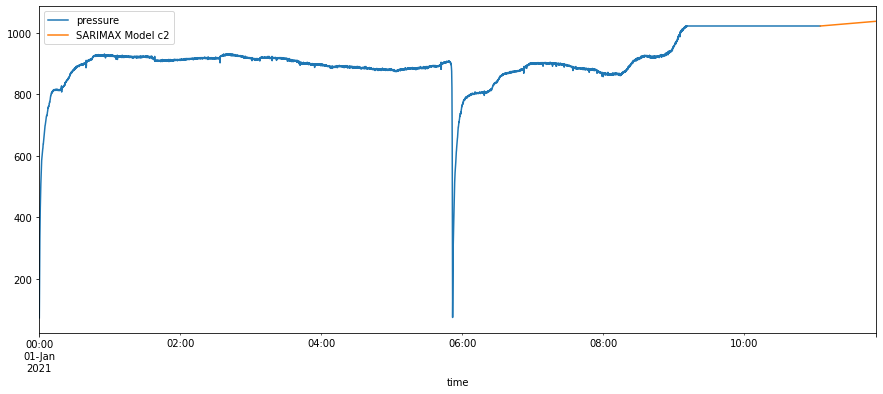

In [ ]:
predictions_c2 = results_c2.predict(start_c2,end_c2).rename('SARIMAX Model c2')

ax_c2 = train_c2['pressure'].plot(legend=True,figsize=(15,6))
predictions_c2.plot(legend=True)

# for pd patients

In [ ]:
auto_arima(pd1['pressure'],seasonal=False).summary(), auto_arima(pd2['pressure'],seasonal=False).summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                      y   No. Observations:                 2627
 Model:               SARIMAX(5, 1, 5)   Log Likelihood              -10695.030
 Date:                Mon, 13 Sep 2021   AIC                          21414.059
 Time:                        08:02:28   BIC                          21484.538
 Sample:                             0   HQIC                         21439.582
                                - 2627                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 intercept      0.0884      0.509      0.174      0.862      -0.910       1.087
 ar.L1          0.8209      0.045     18.386      0.000       0.733   

In [ ]:
len(pd1), len(pd2)

(2627, 5595)

In [ ]:
train_pd1= pd1.iloc[:2500]
test_pd1 = pd1.iloc[2500:]

train_pd2 = pd2.iloc[:5000]
test_pd2 = pd2.iloc[5000:]

In [ ]:
#if value_error :non-invertible starting MA parameters found use enforce
model_pd1 = SARIMAX(train_pd1['pressure'],order=(5,1,5),enforce_invertibility=False)
#if value_error :non-invertible starting MA parameters found use enforce
model_pd2 = SARIMAX(train_pd2['pressure'],order=(5,1,5),enforce_invertibility=False)

In [ ]:
results_pd1 = model_pd1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
results_pd2 = model_pd2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
results_pd1.summary(), results_pd2.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:               pressure   No. Observations:                 2500
 Model:               SARIMAX(5, 1, 5)   Log Likelihood              -10016.603
 Date:                Mon, 13 Sep 2021   AIC                          20055.207
 Time:                        08:07:39   BIC                          20119.267
 Sample:                    01-01-2021   HQIC                         20078.464
                          - 01-01-2021                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.4323      0.154      2.816      0.005       0.131       0.733
 ar.L2          0.0242      0.114      0.213      0.832      -0.199   

In [ ]:
start_pd1 = len(train_pd1)
end_pd1 = len(train_pd1) + len(test_pd1) - 1

start_pd2 = len(train_pd2)
end_pd2 = len(train_pd2) + len(test_pd2) - 1


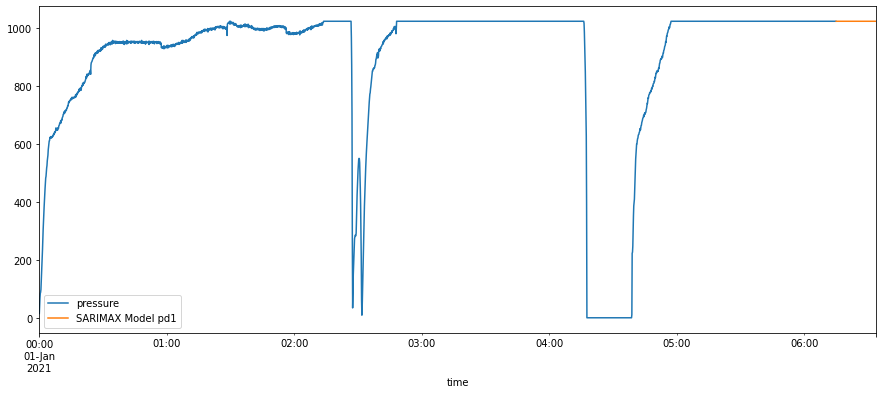

In [ ]:
predictions_pd1 = results_pd1.predict(start_pd1,end_pd1).rename('SARIMAX Model pd1')

ax_pd1 = train_pd1['pressure'].plot(legend=True,figsize=(15,6))
predictions_pd1.plot(legend=True)

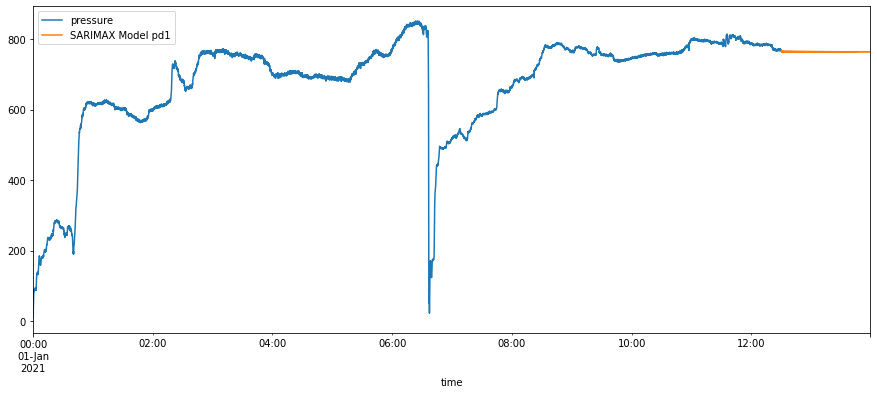

In [ ]:
predictions_pd2 = results_pd2.predict(start_pd2,end_pd2).rename('SARIMAX Model pd1')

ax_pd2 = train_pd2['pressure'].plot(legend=True,figsize=(15,6))
predictions_pd2.plot(legend=True)

Deep learning model

Text(0, 0.5, 'gripangle')

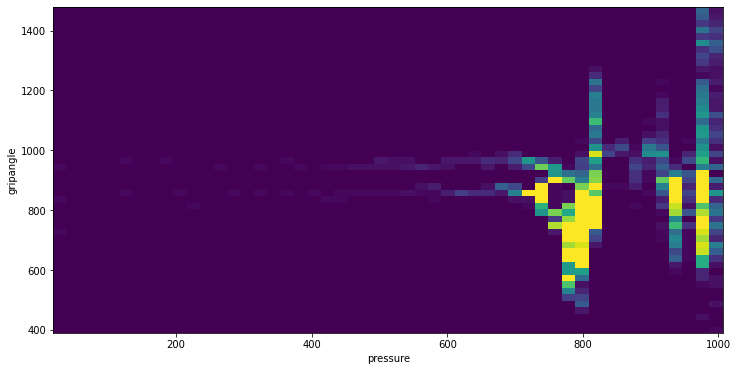

In [ ]:
plt.figure(figsize=(12,6))
plt.hist2d(c1['pressure'],c1['gripangle'], bins=(50,50),vmax = 50)
plt.colorbar
plt.xlabel('pressure')
plt.ylabel('gripangle')

Text(0, 0.5, 'gripangle')

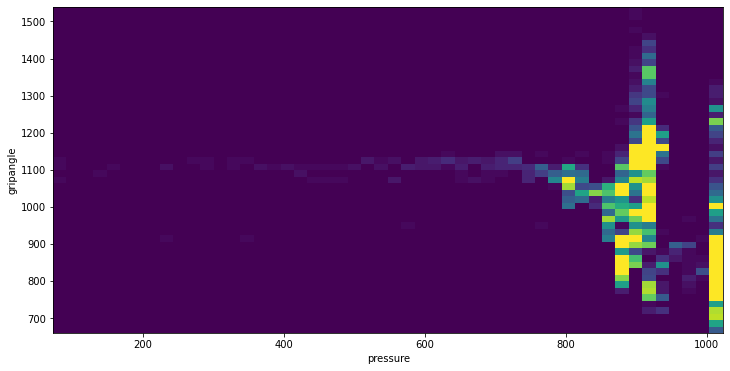

In [ ]:
plt.figure(figsize=(12,6))
plt.hist2d(c2['pressure'],c2['gripangle'], bins=(50,50),vmax = 50)
plt.colorbar
plt.xlabel('pressure')
plt.ylabel('gripangle')

Text(0, 0.5, 'gripangle')

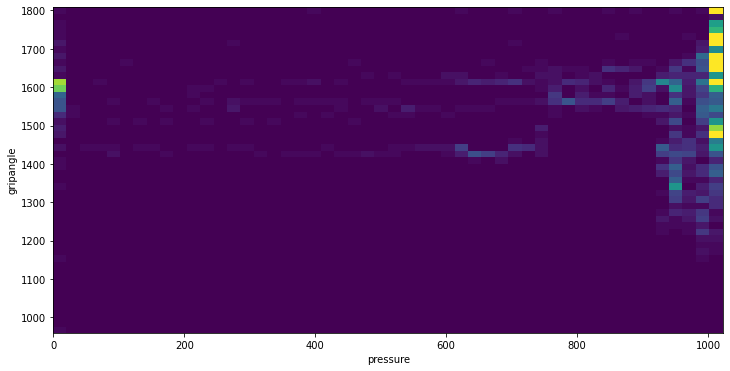

In [ ]:
plt.figure(figsize=(12,6))
plt.hist2d(pd1['pressure'],pd1['gripangle'], bins=(50,50),vmax = 50)
plt.colorbar
plt.xlabel('pressure')
plt.ylabel('gripangle')

Text(0, 0.5, 'gripangle')

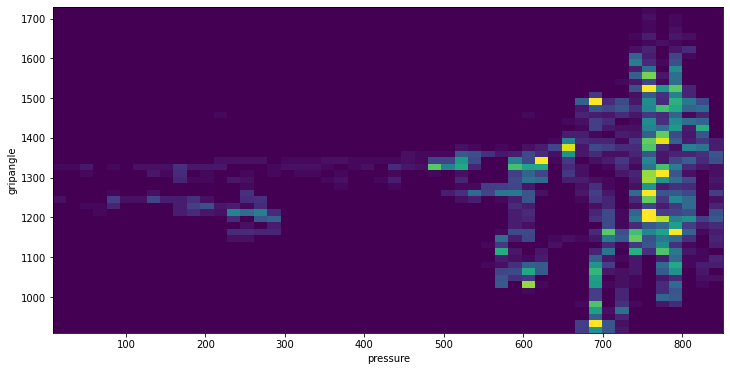

In [ ]:
plt.figure(figsize=(12,6))
plt.hist2d(pd2['pressure'],pd2['gripangle'], bins=(50,50),vmax = 50)
plt.colorbar
plt.xlabel('pressure')
plt.ylabel('gripangle')

In [ ]:
control_row = pd.read_excel('control_row.xlsx',header=[0,1])


In [ ]:
control_row.columns

MultiIndex([(  'time',      'time'),
            ( 'c_004',         'x'),
            ( 'c_004',         'y'),
            ( 'c_004',         'z'),
            ( 'c_004',  'pressure'),
            ( 'c_004', 'gripangle'),
            ('c__009',         'x'),
            ('c__009',         'y'),
            ('c__009',         'z'),
            ('c__009',  'pressure'),
            ('c__009', 'gripangle'),
            ('c__002',         'x'),
            ('c__002',         'y'),
            ('c__002',         'z'),
            ('c__002',  'pressure'),
            ('c__002', 'gripangle'),
            ('c__006',         'x'),
            ('c__006',         'y'),
            ('c__006',         'z'),
            ('c__006',  'pressure'),
            ('c__006', 'gripangle'),
            ('c__001',         'x'),
            ('c__001',         'y'),
            ('c__001',         'z'),
            ('c__001',  'pressure'),
            ('c__001', 'gripangle')],
           )

In [ ]:
control_row.set_index([('time','time')],inplace=True)

In [ ]:
control_row.index.freq = '7S'

In [ ]:
control_row.head()

c_004                       ... c__001                        
                         x      y    z pressure  ...      y    z pressure gripangle
(time, time)                                     ...                               
2021-01-01 00:00:00  200.0  203.0  0.0     73.0  ...  204.0  0.0     73.0     910.0
2021-01-01 00:00:07  200.0  203.0  0.0    149.0  ...  204.0  0.0    218.0     900.0
2021-01-01 00:00:14  200.0  203.0  0.0    227.0  ...  204.0  0.0    253.0     900.0
2021-01-01 00:00:21  199.0  203.0  0.0    288.0  ...  204.0  0.0    304.0     900.0
2021-01-01 00:00:28  199.0  203.0  0.0    334.0  ...  204.0  0.0    351.0     900.0

[5 rows x 25 columns]

In [ ]:
control_row.isnull().sum()

c_004   x             706
        y             706
        z             706
        pressure      706
        gripangle     706
c__009  x               0
        y               0
        z               0
        pressure        0
        gripangle       0
c__002  x               0
        y               0
        z               0
        pressure        0
        gripangle       0
c__006  x            1738
        y            1738
        z            1738
        pressure     1738
        gripangle    1738
c__001  x            1015
        y            1015
        z            1015
        pressure     1015
        gripangle    1015
dtype: int64

In [ ]:
control_row.dropna(inplace=True)

In [ ]:
control_row.values.shape

(5077, 25)

#grabbing hour,minute second information from index and putting into the new variable  named barious

In [ ]:
control_row['various','hours'] = control_row.index.hour
control_row['various','minutes'] = control_row.index.minute
control_row['various','seconds'] = control_row.index.second

In [ ]:
target_patient = 'c__002'
target_features = ['pressure','gripangle']

In [ ]:
control_row.columns

MultiIndex([(  'c_004',         'x'),
            (  'c_004',         'y'),
            (  'c_004',         'z'),
            (  'c_004',  'pressure'),
            (  'c_004', 'gripangle'),
            ( 'c__009',         'x'),
            ( 'c__009',         'y'),
            ( 'c__009',         'z'),
            ( 'c__009',  'pressure'),
            ( 'c__009', 'gripangle'),
            ( 'c__002',         'x'),
            ( 'c__002',         'y'),
            ( 'c__002',         'z'),
            ( 'c__002',  'pressure'),
            ( 'c__002', 'gripangle'),
            ( 'c__006',         'x'),
            ( 'c__006',         'y'),
            ( 'c__006',         'z'),
            ( 'c__006',  'pressure'),
            ( 'c__006', 'gripangle'),
            ( 'c__001',         'x'),
            ( 'c__001',         'y'),
            ( 'c__001',         'z'),
            ( 'c__001',  'pressure'),
            ( 'c__001', 'gripangle'),
            ('various',     'hours'),
            

In [ ]:
control_row_targets = control_row[target_patient][target_features].shift(-shift_steps)

In [ ]:
control_row[target_patient][target_features].head(shift_steps+5)

,pressure,gripangle
"(time, time)",,
2021-01-01 00:00:00,126,860
2021-01-01 00:00:07,202,860
2021-01-01 00:00:14,276,860
2021-01-01 00:00:21,328,860
2021-01-01 00:00:28,373,860
...,...,...
2021-01-01 00:07:00,689,880
2021-01-01 00:07:07,690,880
2021-01-01 00:07:14,689,880


In [ ]:
control_row_targets.tail(61)

,pressure,gripangle
"(time, time)",,
2021-01-01 09:45:12,977.0,1010.0
2021-01-01 09:45:19,NaN,NaN
2021-01-01 09:45:26,NaN,NaN
2021-01-01 09:45:33,NaN,NaN
2021-01-01 09:45:40,NaN,NaN
...,...,...
2021-01-01 09:51:44,NaN,NaN
2021-01-01 09:51:51,NaN,NaN
2021-01-01 09:51:58,NaN,NaN


In [ ]:
x_data = control_row.values[0:-shift_steps]


In [ ]:
print(type(x_data))
print('shape:', x_data.shape)

<class 'numpy.ndarray'>
shape: (5017, 28)


In [ ]:
y_data = control_row_targets.values[:-shift_steps]

In [ ]:
print(type(y_data))
print('shape:', y_data.shape)

<class 'numpy.ndarray'>
shape: (5017, 2)


In [ ]:
#train_test_split

In [ ]:
num_data = 5017

In [ ]:
train_split = 0.9

In [ ]:
num_train = int(train_split * num_data)
num_train

4515

In [ ]:
num_test = num_data - num_train
num_test

502

In [ ]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

5017

In [ ]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

5017

In [ ]:
num_x_signals = x_data.shape[1]
num_x_signals

28

In [ ]:
num_y_signals = y_data.shape[1]
num_y_signals

2

In [ ]:
print('MIN:',np.min(x_train))
print('Max:',np.max(x_train))

MIN: 0.0
Max: 1770.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
x_scaler = MinMaxScaler(feature_range=(0,1))
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [ ]:
print('MIN:',np.min(x_train_scaled))
print('Max:',np.max(x_train_scaled))

MIN: 0.0
Max: 1.0


In [ ]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(4515, 28)
(4515, 2)


In [ ]:
def batch_genertaor(batch_size,sequence_length):
  'generate function for creating random batches of training data'

  #infinte loop
  while True:
    #allocate a new array for the batch_size of input signals
    x_shape = (batch_size,sequence_length,num_x_signals)
    x_batch = np.zeros(shape=x_shape,dtype=np.float16)

    #allocate a new array for the batch_size of ouput signals
    y_shape = (batch_size,sequence_length,num_y_signals)
    y_batch = np.zeros(shape=y_shape,dtype=np.float16)

    #fill the bacth with random sequences of data
    for i in range(batch_size):
      #get a random start index
      #this points somewhere into the training data
      idx = np.random.randint(num_train - sequence_length)

      #copy the sequences of data starting at this index
      x_batch[i] = x_train_scaled[idx:idx+sequence_length]
      y_batch[i] = y_train_scaled[idx:idx+sequence_length]

    yield (x_batch,y_batch)

In [ ]:
batch_size = 256

In [ ]:
#this corresponds to 600 seconds or 10 minutes
sequence_length = 10*60
sequence_length

600

#creating a batch_generator

In [ ]:
generator = batch_genertaor(batch_size=batch_size, sequence_length=sequence_length)

In [ ]:
x_batch, y_batch = next(generator)

In [ ]:
print(x_batch.shape)
print(y_batch.shape)

(256, 600, 28)
(256, 600, 2)


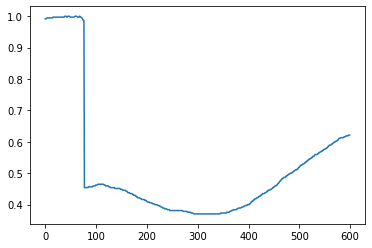

In [ ]:
batch = 0 # first sequence in the batch
signal = 0 # first signal from the 28 input signals
seq = x_batch[batch,:,signal]
plt.plot(seq)

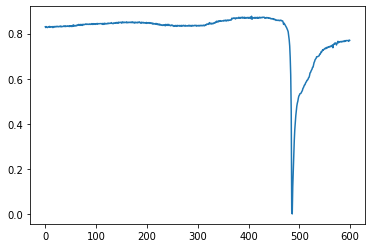

In [ ]:
seq = y_batch[batch,:,signal]
plt.plot(seq)

In [ ]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [ ]:
#creating the recurrent neural netowrks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, GRU, Dense
from tensorflow.keras.optimizers import  RMSprop
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard, ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.backend import square, mean

In [ ]:
model = Sequential()

In [ ]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None,num_x_signals)))

In [ ]:
model.add(Dense(num_y_signals,activation='sigmoid')) 

In [ ]:
if False:
  from tensorflow.python.keras.inttializers import RandomUniform

  #use lower init-ranges
  model.add(Dense(num_y_signals,activation='linear',
                  kernel_initializer = init))

In [ ]:
#loss function

In [ ]:
warmup_steps = 50

In [ ]:
def loss_mse_warmup(y_true,y_pred):

  #ignore the 'warm up' parts of the sequences
  #by taking slices of the tensors
  y_true_slice = y_true[:,warmup_steps:,:]
  y_pred_slice = y_pred[:,warmup_steps:,:]

  #these sliced tensors both have this shape:
  #this outputs a 3-rank tensor of the same-shape.
  
  #keras may reduce this across the first axis(batch)
  mse = mean(square(y_true_slice - y_pred_slice))

  return mse

In [ ]:
#compiling the model

In [ ]:
optimizer = RMSprop(lr=1e-3)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.compile(loss=loss_mse_warmup,optimizer=optimizer)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 512)         832512    
_________________________________________________________________
dense_2 (Dense)              (None, None, 2)           1026      
Total params: 833,538
Trainable params: 833,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#early stopping 
callback_early_stopping  = EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [ ]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [ ]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [ ]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [ ]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [ ]:
%%time
model.fit_generator(generator=generator,epochs=20,steps_per_epoch=100,validation_data=validation_data,callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 1791s 18s/step - loss: 0.0091 - val_loss: 0.0243

Epoch 00001: val_loss improved from inf to 0.02426, saving model to 23_checkpoint.keras
Epoch 2/20
100/100 [==============================] - 1791s 18s/step - loss: 0.0043 - val_loss: 0.0247

Epoch 00002: val_loss did not improve from 0.02426

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/20
100/100 [==============================] - 1779s 18s/step - loss: 0.0022 - val_loss: 0.0180

Epoch 00003: val_loss improved from 0.02426 to 0.01798, saving model to 23_checkpoint.keras
Epoch 4/20
100/100 [==============================] - 1797s 18s/step - loss: 0.0017 - val_loss: 0.0185

Epoch 00004: val_loss did not improve from 0.01798

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 5/20
100/100 [==============================] - 1791s 18s/step - loss: 0.0015 - val_loss: 0.0163

Epoch 00005: val_loss improved from 0.01798 to 0.0

In [ ]:
#load checkpoint
try:
  model.load_weights(path_checkpoint)
except Exception as error:
  print('Error trying to load checkpoint')
  print(error)

In [ ]:
#performance on test

In [ ]:
result = model.evaluate(x=np.expand_dims(x_test_scaled,axis=0),
                        y=np.expand_dims(y_test_scaled,axis=0))

1/1 [==============================] - 0s 141ms/step - loss: 0.0120


In [ ]:
print('loss (test-set:', result)

loss (test-set: 0.01199811790138483


In [ ]:
# If  have several metrics we can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [ ]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_features)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_features[signal])
        plt.legend()
        plt.show()

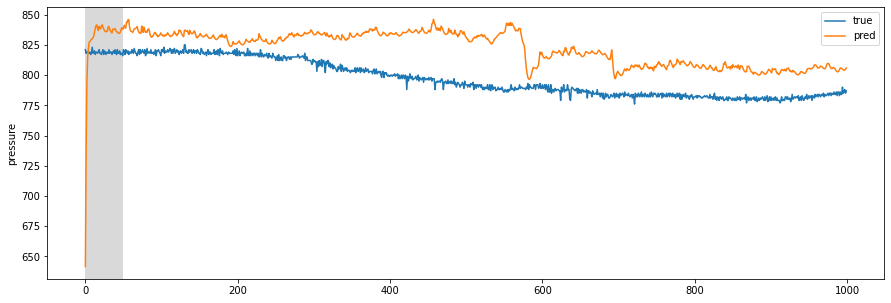

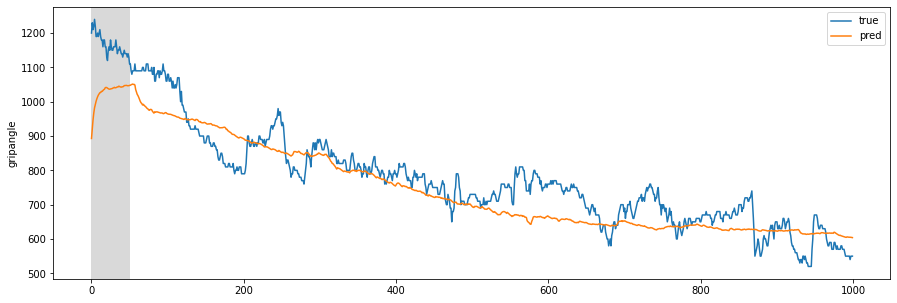

In [ ]:
plot_comparison(start_idx=2000,length=1000,train=True)

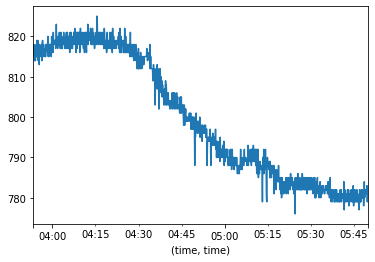

In [ ]:
control_row['c__002']['pressure'][2000:2000+1000].plot();

In [ ]:
#parkinson analysis

In [ ]:
parkinson_row = pd.read_excel('pd.xlsx',header=[0,1])
parkinson_row.columns

MultiIndex([(      'time',      'time'),
            ('P_02100001',         'x'),
            ('P_02100001',         'y'),
            ('P_02100001',         'z'),
            ('P_02100001',  'pressure'),
            ('P_02100001', 'gripangle'),
            ('P_02100001',    'testid'),
            ('P_05060004',         'x'),
            ('P_05060004',         'y'),
            ('P_05060004',         'z'),
            ('P_05060004',  'pressure'),
            ('P_05060004', 'gripangle'),
            ('P_05060004',    'testid'),
            ('P_09100001',         'x'),
            ('P_09100001',         'y'),
            ('P_09100001',         'z'),
            ('P_09100001',  'pressure'),
            ('P_09100001', 'gripangle'),
            ('P_09100001',    'testid'),
            ('P_11120003',         'x'),
            ('P_11120003',         'y'),
            ('P_11120003',         'z'),
            ('P_11120003',  'pressure'),
            ('P_11120003', 'gripangle'),
            ('P_

In [ ]:
parkinson_row.set_index([('time','time')],inplace=True)
parkinson_row.tail()

P_02100001                   ... P_11120004                          
                             x   y   z pressure  ...          z pressure gripangle testid
(time, time)                                     ...                                     
2021-01-02 00:59:15        NaN NaN NaN      NaN  ...        NaN      NaN       NaN    NaN
2021-01-02 00:59:24        NaN NaN NaN      NaN  ...        NaN      NaN       NaN    NaN
2021-01-02 00:59:33        NaN NaN NaN      NaN  ...        NaN      NaN       NaN    NaN
2021-01-02 00:59:42        NaN NaN NaN      NaN  ...        NaN      NaN       NaN    NaN
2021-01-02 00:59:51        NaN NaN NaN      NaN  ...        NaN      NaN       NaN    NaN

[5 rows x 30 columns]

In [ ]:

parkinson_row.index.freq = '9S'
parkinson_row.dropna(inplace=True)

In [ ]:
parkinson_row.tail()

P_02100001               ... various                
                             x      y     z  ...   hours minutes seconds
(time, time)                                 ...                        
2021-01-01 14:29:06      227.0  252.0   0.0  ...      14      29       6
2021-01-01 14:29:15      227.0  252.0   0.0  ...      14      29      15
2021-01-01 14:29:24      227.0  252.0   0.0  ...      14      29      24
2021-01-01 14:29:33      227.0  252.0   0.0  ...      14      29      33
2021-01-01 14:29:42      227.0  252.0  12.0  ...      14      29      42

[5 rows x 33 columns]

In [ ]:
parkinson_row.values.shape

(5799, 30)

In [ ]:
parkinson_row['various','hours'] = parkinson_row.index.hour
parkinson_row['various','minutes'] = parkinson_row.index.minute
parkinson_row['various','seconds'] = parkinson_row.index.second

In [ ]:
target_parkinson = 'P_11120004'
target_features = ['pressure','gripangle']

In [ ]:
shift_minutes = 1
shift_steps = shift_minutes*60
parkinson_row_targets = parkinson_row[target_parkinson][target_features].shift(-shift_steps)

In [ ]:
parkinson_row[target_parkinson][target_features].head(shift_steps+5)

,pressure,gripangle
"(time, time)",,
2021-01-01 00:00:00,8.0,1070.0
2021-01-01 00:00:09,29.0,1060.0
2021-01-01 00:00:18,54.0,1030.0
2021-01-01 00:00:27,71.0,1010.0
2021-01-01 00:00:36,81.0,1000.0
...,...,...
2021-01-01 00:09:00,289.0,1040.0
2021-01-01 00:09:09,288.0,1040.0
2021-01-01 00:09:18,291.0,1060.0


In [ ]:
x_data_parkinson = parkinson_row.values[:-shift_steps]
print(type(x_data_parkinson))
print('shape:', x_data_parkinson.shape)

<class 'numpy.ndarray'>
shape: (5739, 33)


In [ ]:
y_data_parkinson = parkinson_row_targets.values[:-shift_steps]
print(type(y_data_parkinson))
print('shape:', y_data_parkinson.shape)

<class 'numpy.ndarray'>
shape: (5739, 2)


In [ ]:
num_parkinson_data = 5739
num_parkinson_train = int(train_split * num_parkinson_data)
num_parkinson_train
num_parkinson_test = num_parkinson_data - num_parkinson_train
num_parkinson_test

574

In [ ]:
#parkinson data
x_parkinson_train = x_data_parkinson[0:num_parkinson_train]
x_parkinson_test = x_data_parkinson[num_parkinson_train:]
len(x_parkinson_train) + len(x_parkinson_test)

5739

In [ ]:
#parkinson data
y_parkinson_train = y_data_parkinson[0:num_parkinson_train]
y_parkinson_test = y_data_parkinson[num_parkinson_train:]
len(y_parkinson_train) + len(y_parkinson_test)

5739

In [ ]:
num_x_parkinson_signals = x_data_parkinson.shape[1]
num_x_parkinson_signals


33

In [ ]:
num_y_parkinson_signals = y_data_parkinson.shape[1]
num_y_parkinson_signals

2

In [ ]:
x_scaler = MinMaxScaler(feature_range=(0,1))
x_parkinson_train_scaled = x_scaler.fit_transform(x_parkinson_train)
x_parkinson_test_scaled = x_scaler.transform(x_parkinson_test)

In [ ]:
y_scaler = MinMaxScaler()
y_parkinson_train_scaled = y_scaler.fit_transform(y_parkinson_train)
y_parkinson_test_scaled = y_scaler.transform(y_parkinson_test)

In [ ]:
print(x_parkinson_train_scaled.shape)
print(y_parkinson_train_scaled.shape)

(5165, 33)
(5165, 2)


In [ ]:
def batch_parkinson_genertaor(batch_size,sequence_length):
  'generate function for creating random batches of training data'

  #infinte loop
  while True:
    #allocate a new array for the batch_size of input signals
    x_shape_p = (batch_size,sequence_length,num_x_parkinson_signals)
    x_batch_p = np.zeros(shape=x_shape_p,dtype=np.float16)

    #allocate a new array for the batch_size of ouput signals
    y_shape_p = (batch_size,sequence_length,num_y_parkinson_signals)
    y_batch_p = np.zeros(shape=y_shape_p,dtype=np.float16)

    #fill the bacth with random sequences of data
    for i in range(batch_size):
      #get a random start index
      #this points somewhere into the training data
      idx = np.random.randint(num_parkinson_train - sequence_length)

      #copy the sequences of data starting at this index
      x_batch_p[i] = x_parkinson_train_scaled[idx:idx+sequence_length]
      y_batch_p[i] = y_parkinson_train_scaled[idx:idx+sequence_length]

    yield (x_batch_p, y_batch_p)

In [ ]:
batch_size = 256
#this corresponds to 600 seconds or 10 minutes
sequence_length = 10*60
sequence_length

600

In [ ]:
generator_p = batch_parkinson_genertaor(batch_size=batch_size,sequence_length=sequence_length)

In [ ]:
x_batch_p,y_batch_p = next(generator_p)

In [ ]:
print(x_batch_p.shape)
print(y_batch_p.shape)

(256, 600, 33)
(256, 600, 2)


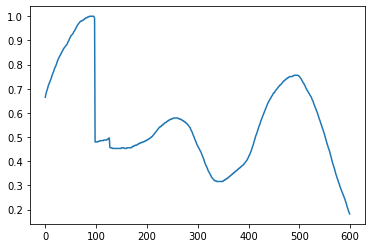

In [ ]:
batch = 0 # first sequence in the batchbatch = 0 # first sequence in the batch
signal = 0 # first signal from the 28 input signals
seq = x_batch_p[batch,:,signal]
plt.plot(seq)

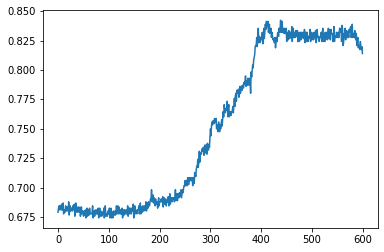

In [ ]:
seq = y_batch_p[batch,:,signal]
plt.plot(seq)

In [ ]:
validation_data_p = (np.expand_dims(x_parkinson_test_scaled, axis=0),
                   np.expand_dims(y_parkinson_test_scaled, axis=0))

In [ ]:
model_p = Sequential()
model_p.add(GRU(units=512,
                return_sequences=True,
                input_shape=(None,num_x_parkinson_signals)))
model_p.add(Dense(num_y_parkinson_signals,activation='sigmoid'))

In [ ]:

if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_parkinson_signals,
                    activation='linear',
                    kernel_initializer=init))

In [ ]:
warmup_steps = 50

In [ ]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

In [ ]:

optimizer = RMSprop(lr=1e-3)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_p.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [ ]:
model_p.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 512)         840192    
_________________________________________________________________
dense_1 (Dense)              (None, None, 2)           1026      
Total params: 841,218
Trainable params: 841,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
path_checkpoint = '24_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [ ]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [ ]:
callback_tensorboard = TensorBoard(log_dir='./24_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [ ]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [ ]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [ ]:
%%time
model_p.fit(x=generator_p,
          epochs=20,
          steps_per_epoch=100,
          validation_data=validation_data_p,
          callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - 1842s 18s/step - loss: 0.0159 - val_loss: 0.0013

Epoch 00001: val_loss improved from inf to 0.00133, saving model to 24_checkpoint.keras
Epoch 2/20
100/100 [==============================] - 1839s 18s/step - loss: 0.0076 - val_loss: 0.0023

Epoch 00002: val_loss did not improve from 0.00133

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/20
100/100 [==============================] - 1834s 18s/step - loss: 0.0027 - val_loss: 0.0019

Epoch 00003: val_loss did not improve from 0.00133

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 4/20
100/100 [==============================] - 1803s 18s/step - loss: 0.0021 - val_loss: 0.0028

Epoch 00004: val_loss did not improve from 0.00133
Epoch 5/20
100/100 [==============================] - 1803s 18s/step - loss: 0.0019 - val_loss: 0.0030

Epoch 00005: val_loss did not improve from 0.00133
Epoch 6/20
100/100 [====================

In [ ]:
#load checkpoint
try:
  model_p.load_weights(path_checkpoint)
except Exception as error:
  print('Error trying to load checkpoint')
  print(error)


In [ ]:
#performance on test
result = model_p.evaluate(x=np.expand_dims(x_parkinson_test_scaled,axis=0),
                        y=np.expand_dims(y_parkinson_test_scaled,axis=0))
print('loss (test-set:', result)

1/1 [==============================] - 0s 150ms/step - loss: 0.0013
loss (test-set: 0.0013271707575768232


In [ ]:
# If  have several metrics we can use this instead.
if False:
    for res, metric in zip(result, model_p.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))


In [ ]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_parkinson_train_scaled
        y_true = y_parkinson_train
    else:
        # Use test-data.
        x = x_parkinson_test_scaled
        y_true = y_parkinson_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model_p.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_features)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_features[signal])
        plt.legend()
        plt.show()

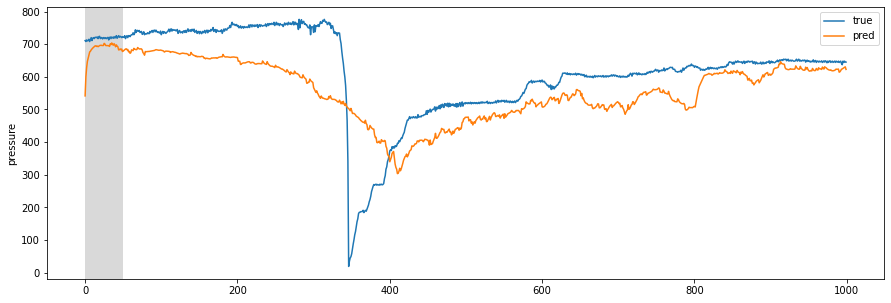

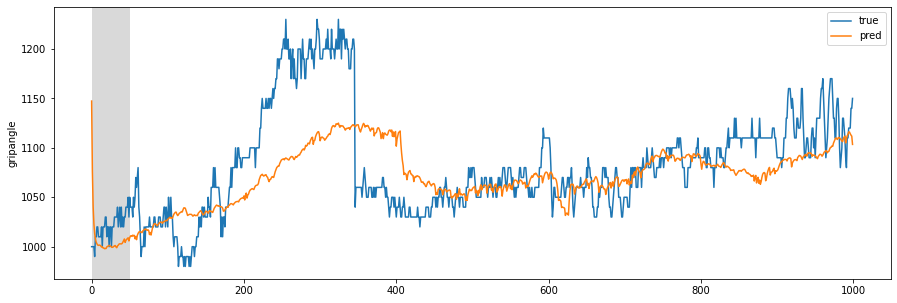

In [ ]:
plot_comparison(start_idx=2000,length=1000,train=True)